# Modelling of Cognitive Processes
## Chapter 05: backpropagation 
---
Lesson 10   
26/11/2019   
Pieter Huycke   

# Overview

## Practical
1. A circular relation: novice
2. Making your own model: journeyman
2. Making your own model: adept
3. Recognizing cats and dogs: expert

# Practical

# 1. A circular relation: novice

## A circular dataset

To let you ease into this practical session, we start with a simulated dataset to show you why backpropagation is important.   
The dataset was created by us, and you will load in the full dataset later on.   
Before we start with the assignment, we will first start with inspecting the dataset.   

The dataset contains values for 2 different features, and a label for each observation. To stay in line with the previous practical, you can imagine that you have two different types of **flowers**, and that you can classify a flower based on **two different flower features**. To inspect whether we can classify the flowers based on the given features, we look at the plot immediately below.   

How the plots were construed is of no importance to you, **only what the plots represent is important**.

In [1]:
# import: general and scikit-learn specific
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns

from sklearn.datasets import make_circles

# general plotting parameters
sns.set(style       = "ticks", 
        color_codes = True)

In [2]:
# make the dataset
coord, label = make_circles(n_samples    = 150,
                            noise        = .075, 
                            factor       = 0.5, 
                            random_state = 1)
coord += 4

In [3]:
# make it a Pandas DataFrame
df = pd.DataFrame({'Feature 1': coord[:,0], 
                   'Feature 2': coord[:,1],
                   'Class': label})

# remap the labels
mymap = {0: 'Flower A', 1: 'Flower B'}
df    = df.applymap(lambda s: mymap.get(s) if s in mymap else s)

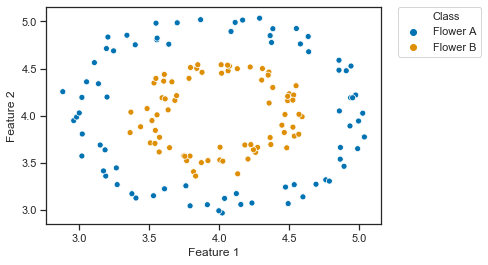

In [4]:
# plot the data
ax = sns.scatterplot(x       = df['Feature 1'], 
                     y       = df['Feature 2'], 
                     hue     = df['Class'],
                     markers = ["o", "s"],
                     palette = sns.color_palette('colorblind', 2))

# Put the legend out of the figure
plt.legend(bbox_to_anchor = (1.05, 1), 
           loc            = 2, 
           borderaxespad  = 0.)

## The iris dataset: novice

<ins>Problem statement</ins>  

Looking at the plot, we see that flower B is clearly seperated from flower A.   
We stored the data in a NumPy array, and saved the data for you to use.   

Your task is straightforward: load in the data, and attempt to classify the flowers using both a two-layered Perceptron, and a multi-layered-Perceptron (MLP, 2+ layers of units). Remember that a two-layered perceptron has no hidden layers (like the ones you used in the previous practical session), and an MLP has per definition at least one hidden layer. For now, start with **a single hidden layer** when building your MLP. Manually try a certain amount of hidden units (e.g. 10, 100, 1000).

Try to formulate an answer to the following questions:   
Are both models able to classify the flower observations? Is one model clearly superior to the other in terms of classification accuracy? Why (not)?   
Try to relate your empirical findings back to the course material.

---

Note: The file "ch5_circular_novice_exercise.py" serves as your starting script, and shows a way to load a downloaded NumPy file.

In [5]:
# import: general and scikit-learn specific
import numpy             as np
import os

from sklearn.linear_model    import Perceptron
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
# load the data
location = r'C:\Users\pieter\Downloads\GitHub\modeling-master\AY 2019 - 2020\Lesson 10\Practical session\exercises'
data     = np.load(os.path.join(location, 'ch5_circular_dataset_novice.npy'))

X = data[:,:2]
y = data[:,-1]

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    train_size = .25)

In [8]:
# ---------- #
# PERCEPTRON #
# ---------- #

# define classifier (Perceptron object from scikit-learn)
classification_algorithm = Perceptron(max_iter         = 10000,
                                      tol              = 1e-3,
                                      verbose          = 0,
                                      n_iter_no_change = 10)


# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

# print accuracy using a built-in sklearn function
print('Perceptron accuracy:\n\t {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

Perceptron accuracy:
	 48.67%


In [9]:
# --- #
# MLP #
# --- #

# define classifier (Perceptron object from scikit-learn)
classification_algorithm = MLPClassifier(hidden_layer_sizes = (1000, ),
                                         max_iter           = 20000)

# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

# print accuracy using a built-in sklearn function
print('MLP accuracy:\n\t {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

MLP accuracy:
	 94.69%


# 2. Making your own model: a stroop model

## Making your own model: journeyman

**Note 1**: no start script available   
**Note 2**: mind that the problem statement is two slides long

<ins>Problem statement (1/2)</ins>  

You would like to model a participant that is performing a Stroop task [(Stroop, 1935)](https://pure.mpg.de/rest/items/item_2389918/component/file_2389917/content).   
Since this is your first time that you build a model on your own, you decide to start with an easy version of this well-known paradigm.   

You decide to use two different word stimuli (GREEN and RED), and two different colors (<font color='green'>green</font> and <font color='red'>red</font>).   
Thus, you have the following possible stimuli:
- <font color='red'>red</font>
- <font color='red'>green</font>
- <font color='green'>red</font>
- <font color='green'>green</font>

## Making your own model: journeyman

<ins>Problem statement (2/2)</ins>  

In line with the classic stroop task, your model should react to either the word dimension or the color dimension.   
Only two possible answers are available: LEFT (coded as 1), and RIGHT (coded as -1).   

Show your model each possible stimulus 50 times, along with the expected response.   
First train your model using a model without hidden units (i.e. a Perceptron), then compare this result with the performance of an MLP with one hidden layer.   
Is there a difference?   

Finally, try to find **the minimal MLP model**. The minimal MLP model is the MLP that you train 50 times on _different_ train data, and where the performance on the test data never drops below 100%.   

Try to find an elegant way to find the minimal model (i.e. the model with the lowest amount of units & hidden layers which still achieves maximal performance).

In [10]:
# import: general and scikit-learn specific
import numpy as np

from sklearn.linear_model    import Perceptron
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

In [11]:
'''
* coding * 
    - Unit 1: context (1 = word is relevant dimension)
    - Unit 2: color   (1 = word is colored in red)
    - Unit 3: word    (1 = RED is shown on the screen)
Mind that the coding does not impact your model's performance as long as one
is using a consistent coding scheme
'''

# define the input patterns
in_1 = np.array([1, 1, 1]) 
in_2 = np.array([1, 0, 0]) 
in_3 = np.array([1, 1, 0])
in_4 = np.array([1, 0, 1])
in_5 = np.array([0, 1, 1])
in_6 = np.array([0, 0, 0])
in_7 = np.array([0, 1, 0])
in_8 = np.array([0, 0, 1])

# define the targets
t1 = np.array( [1])
t2 = np.array([-1])
t3 = np.array( [1])
t4 = np.array([-1])
t5 = np.array( [1])
t6 = np.array([-1])
t7 = np.array([-1])
t8 = np.array( [1])

# zip them together
input_arr  = np.vstack((in_1, in_2, in_3, in_4, in_5, in_6, in_7, in_8))
target_arr = np.vstack((t1, t2, t3, t4, t5, t6, t7, t8))

del in_1, in_2, in_3, in_4, in_5, in_6, in_7, in_8
del t1,   t2,   t3,   t4,   t5,   t6,   t7,   t8

inputs  = np.tile(input_arr, (50,1))
targets = np.tile(target_arr, (50,1))
targets = np.ravel(targets)

In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(inputs, 
                                                    targets,
                                                    train_size = .25)

In [13]:
# ---------- #
# PERCEPTRON #
# ---------- #

# define classifier (Perceptron object from scikit-learn)
classification_algorithm = Perceptron(max_iter         = 10000,
                                      tol              = 1e-3,
                                      verbose          = 0,
                                      n_iter_no_change = 10)


# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

# print accuracy using a built-in sklearn function
print('Perceptron accuracy:\n\t {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

Perceptron accuracy:
	 76.00%


In [27]:
# --- #
# MLP #
# --- #

max_hidden   = 20
consec_loops = 50

for hidden_units in range(1, max_hidden + 1):
    
    unsatisfied = False
    
    for loop_number in range(consec_loops):
        
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(inputs, 
                                                            targets,
                                                            train_size = .25)

        # define classifier (Perceptron object from scikit-learn)
        classification_algorithm = MLPClassifier(hidden_layer_sizes = (hidden_units, ),
                                                 max_iter           = 10000, 
                                                 n_iter_no_change   = 10)
        
        # fit ('train') classifier to the training data
        classification_algorithm.fit(X_train, y_train)
        
        # predict y based on x for the test data
        y_pred = classification_algorithm.predict(X_test)
        
        # print accuracy using a built-in sklearn function
        if int(accuracy_score(y_test, y_pred)) < 1.0:
            unsatisfied = True
            break
        
    if unsatisfied:
        print('Using {} hidden units was found not good enough'.format(hidden_units))
    else:
        print('We have 100% accuracy when using {} hidden units'.format(hidden_units))
        break

Using 1 hidden units was found not good enough
Using 2 hidden units was found not good enough
Using 3 hidden units was found not good enough
Using 4 hidden units was found not good enough
Using 5 hidden units was found not good enough
Using 6 hidden units was found not good enough
Using 7 hidden units was found not good enough
We have 100% accuracy when using 8 hidden units


# Making your own model: adept

## Making your own model: adept

<ins>Problem statement</ins>  

In the previous exercise, you created a simple Stroop model. However, this model can be extended to fit the experimental findings better. Specifically, the Stroop effect states that human subjects perform better on the word reading than on the color naming. It is hypothesized that this effect occurs because humans are well-trained on reading, but that color naming is a bit 'undertrained'.   

Find a way to represent the greater familiarity with reading in your model. 

---

Learning disabilities can also be represented in your computational Stroop model.   
How would you represent a subject that has difficulty learning the task?   
See whether the model's accuracy decreases with your implementation of a learning disability.   

In [ ]:
# import: general and scikit-learn specific
import numpy as np

from sklearn.linear_model    import Perceptron
from sklearn.neural_network  import MLPClassifier
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
'''
* coding * 
    - Unit 1: context (1 = word is relevant dimension)
    - Unit 2: color   (1 = word is colored in red)
    - Unit 3: word    (1 = RED is shown on the screen)
Mind that the coding does not impact your model's performance as long as one
is using a consistent coding scheme
'''

# define the input patterns
in_1 = np.array([1, 1, 1]) 
in_2 = np.array([1, 0, 0]) 
in_3 = np.array([1, 1, 0])
in_4 = np.array([1, 0, 1])
in_5 = np.array([0, 1, 1])
in_6 = np.array([0, 0, 0])
in_7 = np.array([0, 1, 0])
in_8 = np.array([0, 0, 1])

# define the targets
t1 = np.array( [1])
t2 = np.array([-1])
t3 = np.array( [1])
t4 = np.array([-1])

t5 = np.array( [1])
t6 = np.array([-1])
t7 = np.array([-1])
t8 = np.array( [1])

In [ ]:
# zip them together
trained_input  = np.vstack((in_1, in_2, in_3, in_4))
trained_input  = np.tile(trained_input, (3,1))

trained_output = np.vstack((t1,   t2,   t3,   t4))
trained_output = np.tile(trained_output, (3,1))

input_arr  = np.vstack((trained_input,  in_5, in_6, in_7, in_8))
target_arr = np.vstack((trained_output, t5,   t6,   t7,   t8))

del in_1, in_2, in_3, in_4, in_5, in_6, in_7, in_8
del t1,   t2,   t3,   t4,   t5,   t6,   t7,   t8
del trained_input, trained_output

inputs  = np.tile(input_arr, (50,1))
targets = np.tile(target_arr, (50,1))
targets = np.ravel(targets)

del input_arr, target_arr

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(inputs, 
                                                    targets,
                                                    train_size = .25)

In [ ]:
# ---------- #
# PERCEPTRON #
# ---------- #

# define classifier (Perceptron object from scikit-learn)
classification_algorithm = Perceptron(max_iter         = 10000,
                                      tol              = 1e-3,
                                      verbose          = 0,
                                      n_iter_no_change = 10)

# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

# print accuracy using a built-in sklearn function
print('Perceptron accuracy:\n\t {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

In [ ]:
# --- #
# MLP #
# --- #

# define classifier (Perceptron object from scikit-learn)
classification_algorithm = MLPClassifier(hidden_layer_sizes = (8, ),
                                         max_iter           = 10000)

# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

# learning disability (actively altering the weights of the model)
for indx in range(len(classification_algorithm.coefs_)):
    shape     = classification_algorithm.coefs_[indx].shape
    mu, sigma = 0, 5
    noise     = np.random.normal(mu, sigma, (shape[0], shape[1]))
    classification_algorithm.coefs_[indx] += noise 

# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

# print accuracy using a built-in sklearn function
print('MLP accuracy:\n\t {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

# Recognizing cats and dogs: expert

## Model building

Similar to the last exercise of the previous practical session, we will work with images to train our model.   
The images we will be working with in this case are images of both cats and dogs.   
For the sake of parsimony, we will only work with 15 images of each category.   

Because image processing is not in our final competences, we did the image processing for you.   
Although we don't expect you to come up with a preprocessing strategy yourself, we will shortly explain how we preprocessed our training set.   

1. We grayscaled the images
2. We resized the images so that they all have the same dimensions ($80 \times 80$)
3. We normalize the images by subtracting the mean of each image from each individual image pixel

Below, we show an original image of a cat, and its preprocessed equivalent.

In [18]:
# import relevant modules
import cv2
import matplotlib.pyplot as plt
import numpy             as np
import os

In [19]:
# constants
DIM_SIZE     = 80
CAT_COUNT    = 0
DOG_COUNT    = 0 

ROOT         = r'C:\Users\pieter\Downloads\GitHub\modeling-master\AY 2019 - 2020\Lesson 10\Practical session\solutions\downloads'
TRAIN_DIR    = os.path.join(ROOT, 'train')

In [20]:
# function def
def process_image(file_location, file_name, dimension):
    
    '''
    :param str file_location: The path where the image is located
    :param str file_name: The name of the image
    
    :return: The rescaled (80 x 80), normalized and grayscaled 
             NumPy array depicting image
    '''
    
    file  = os.path.join(file_location, file_name)
    imag  = cv2.imread(file,
                       cv2.IMREAD_GRAYSCALE)
    imag  = cv2.resize(imag,
                       dsize = (dimension, dimension))
    
    imag  = imag.astype('float64')
    imag -= np.mean(imag)
    
    return imag

Text(0.5, 1.0, 'Preprocessed cat')

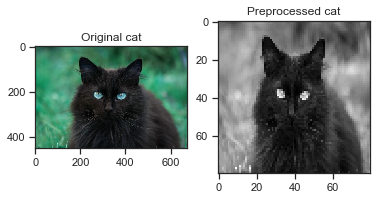

In [21]:
# define our list of training and test samples
images = os.listdir(TRAIN_DIR)

# original cat
plt.subplot(1, 2, 1)
original_image = cv2.imread(os.path.join(TRAIN_DIR, images[3]))
plt.imshow(original_image)
plt.title('Original cat')

# preprocessed cat
plt.subplot(1, 2, 2)
preprocessed_image = process_image(TRAIN_DIR, 
                                   images[3], 
                                   DIM_SIZE)
plt.imshow(preprocessed_image,
           cmap = "gray")
plt.title('Preprocessed cat')

## Recognizing cats and dogs: expert

<ins>Problem statement</ins>  

Train a model using the provided images.   
The goal of your model building is to create a model that is able to label a new image correctly as a cat or dog.   
Use 29 of your images to train the model, and keep the last image to test your model.   
Test the following manipulations:
1. Does performance increase or decrease with more hidden layers?
2. How many hidden layers do you need to achieve a classification accuracy of at least 90%?
3. Train a model that has 2+ hidden layers, and test your model on the data it used to train with.   
   What happens to your prediction accuracy, and why does this happen?

Use ```help(MLPClassifier)``` or ```print(MLPClassifier.__doc__)``` to learn more about the function arguments that can be altered.

In [22]:
# import relevant modules
import numpy             as np
import os
import pickle

from sklearn.neural_network import MLPClassifier
from sklearn.metrics        import accuracy_score

In [23]:
# load in the data
os.chdir(r'C:\Users\pieter\Downloads\GitHub\modeling-master\AY 2019 - 2020\Lesson 10\Practical session\solutions\downloads\processed')

objects = []
with (open("cats_dogs.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break


dataset = objects[0]

del objects

# some background
print(dataset.DESC)

# load data
X = dataset.images
y = dataset.target

# reshape images to fit the perceptron
X = np.array(X).reshape(-1, X.shape[1] * X.shape[1])

The small dataset that you are working with at this moment is the result of scraping Google images for 15 pictures of cats, and 15 images of dogs. Mind that preprocessing has already been done. This means that the images are grayscaled , and all have the same dimensions.


In [24]:
# shuffle arrays together
indx = np.arange(X.shape[0])
np.random.shuffle(indx)

X_shuffled = X[indx]
y_shuffled = y[indx]

In [25]:
# split the data in the training proportion and the test proportion
X_train, y_train, X_test, y_test = X_shuffled[:29,:], y_shuffled[:29], \
                                   X_shuffled[29:,:], y_shuffled[29:]

del indx, X_shuffled, y_shuffled

# define classifier (Perceptron object from scikit-learn)
classification_algorithm = MLPClassifier(hidden_layer_sizes = (100,),
                                         activation         = 'logistic',
                                         solver             = 'sgd',
                                         learning_rate      = 'adaptive',
                                         max_iter           = 200000, 
                                         early_stopping     = False)

# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

In [26]:
# print accuracy using a built-in sklearn function
print('Accuracy percentage: {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

Accuracy percentage: 0.00%
